## [ 과제 1] : CBOW 신경망 모델 구현

In [17]:
from mynlp import preprocess, create_co_matrix, cos_similarity, most_similar,create_contexts_target, convert_one_hot
import numpy as np
import matplotlib.pyplot as plt

In [18]:
from nn_layers import  MatMul, SoftmaxWithLoss,Adam,SGD,Trainer

In [3]:
# 다중 분류 모델 : Softmax 사용
class SimpleCBOW:
    def __init__(self, vocab_size, hidden_size): # 어휘 수 : 14개, 은닉 층의 뉴런수 : 5
        V, H = vocab_size, hidden_size

        # 가중치 초기화
        W_in = 0.01 * np.random.randn(V, H).astype('f')
        W_out = 0.01 * np.random.randn(H, V).astype('f')

        # 계층 생성
        self.in_layer0 = MatMul(W_in)
        self.in_layer1 = MatMul(W_in)
        self.out_layer = MatMul(W_out)
        self.loss_layer = SoftmaxWithLoss()

        # 모든 가중치와 기울기를 리스트에 모은다.
        layers = [self.in_layer0, self.in_layer1, self.out_layer]
        self.params, self.grads = [], []
        for layer in layers:
            self.params += layer.params
            self.grads += layer.grads

        # 인스턴스 변수에 단어의 분산 표현을 저장한다.
        self.word_vecs = W_in
        
    def predict(self,contexts):
        h0 = self.in_layer0.forward(contexts[:, 0])
        h1 = self.in_layer1.forward(contexts[:, 1])
        h = (h0 + h1) * 0.5
        score = self.out_layer.forward(h)
        return self.loss_layer.softmax(score) # softmax로 변화
        
    def forward(self, contexts, target):
        h0 = self.in_layer0.forward(contexts[:, 0])
        h1 = self.in_layer1.forward(contexts[:, 1])
        h = (h0 + h1) * 0.5
        score = self.out_layer.forward(h)
        loss = self.loss_layer.forward(score, target)
        return loss
    
    def backward(self, dout=1):
        ds = self.loss_layer.backward(dout)
        da = self.out_layer.backward(ds)
        da *= 0.5
        self.in_layer1.backward(da)
        self.in_layer0.backward(da)
        return None

In [4]:
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')

window_size = 1
hidden_size = 5
batch_size = 3
max_epoch = 1000

# text = "The black cat ran so fast that the white mouse could not run away."
text = "Sawyer also appears in at least three unfinished Twain works, \
        Huck and Tom Among the Indians, Schoolhouse Hill and Tom Sawyer's Conspiracy.\
        While all three uncompleted works were posthumously published, \
        only Tom Sawyer's Conspiracy has a complete plot, as Twain abandoned \
        the other two works after finishing only a few chapters."
corpus, word_to_id, id_to_word = preprocess(text)

vocab_size = len(word_to_id)
contexts, target = create_contexts_target(corpus, window_size)
target = convert_one_hot(target, vocab_size)
contexts = convert_one_hot(contexts, vocab_size)

model = SimpleCBOW(vocab_size, hidden_size)
optimizer = Adam()
trainer = Trainer(model, optimizer)

trainer.fit(contexts, target, max_epoch, batch_size)

| 에폭 1 |  반복 1 / 27 | 시간 0[s] | 손실 3.74
| 에폭 1 |  반복 21 / 27 | 시간 0[s] | 손실 3.74
| 에폭 2 |  반복 1 / 27 | 시간 0[s] | 손실 3.74
| 에폭 2 |  반복 21 / 27 | 시간 0[s] | 손실 3.73
| 에폭 3 |  반복 1 / 27 | 시간 0[s] | 손실 3.73
| 에폭 3 |  반복 21 / 27 | 시간 0[s] | 손실 3.72
| 에폭 4 |  반복 1 / 27 | 시간 0[s] | 손실 3.72
| 에폭 4 |  반복 21 / 27 | 시간 0[s] | 손실 3.71
| 에폭 5 |  반복 1 / 27 | 시간 0[s] | 손실 3.69
| 에폭 5 |  반복 21 / 27 | 시간 0[s] | 손실 3.68
| 에폭 6 |  반복 1 / 27 | 시간 0[s] | 손실 3.68
| 에폭 6 |  반복 21 / 27 | 시간 0[s] | 손실 3.64
| 에폭 7 |  반복 1 / 27 | 시간 0[s] | 손실 3.62
| 에폭 7 |  반복 21 / 27 | 시간 0[s] | 손실 3.61
| 에폭 8 |  반복 1 / 27 | 시간 0[s] | 손실 3.57
| 에폭 8 |  반복 21 / 27 | 시간 0[s] | 손실 3.56
| 에폭 9 |  반복 1 / 27 | 시간 0[s] | 손실 3.52
| 에폭 9 |  반복 21 / 27 | 시간 0[s] | 손실 3.46
| 에폭 10 |  반복 1 / 27 | 시간 0[s] | 손실 3.50
| 에폭 10 |  반복 21 / 27 | 시간 0[s] | 손실 3.43
| 에폭 11 |  반복 1 / 27 | 시간 0[s] | 손실 3.45
| 에폭 11 |  반복 21 / 27 | 시간 0[s] | 손실 3.36
| 에폭 12 |  반복 1 / 27 | 시간 0[s] | 손실 3.33
| 에폭 12 |  반복 21 / 27 | 시간 0[s] | 손실 3.31
| 에폭 13 |  반복 1 / 27 |

| 에폭 123 |  반복 1 / 27 | 시간 0[s] | 손실 1.20
| 에폭 123 |  반복 21 / 27 | 시간 0[s] | 손실 1.19
| 에폭 124 |  반복 1 / 27 | 시간 0[s] | 손실 1.53
| 에폭 124 |  반복 21 / 27 | 시간 0[s] | 손실 1.33
| 에폭 125 |  반복 1 / 27 | 시간 0[s] | 손실 1.29
| 에폭 125 |  반복 21 / 27 | 시간 0[s] | 손실 1.31
| 에폭 126 |  반복 1 / 27 | 시간 0[s] | 손실 1.19
| 에폭 126 |  반복 21 / 27 | 시간 0[s] | 손실 1.33
| 에폭 127 |  반복 1 / 27 | 시간 0[s] | 손실 0.95
| 에폭 127 |  반복 21 / 27 | 시간 0[s] | 손실 1.14
| 에폭 128 |  반복 1 / 27 | 시간 0[s] | 손실 1.67
| 에폭 128 |  반복 21 / 27 | 시간 0[s] | 손실 1.32
| 에폭 129 |  반복 1 / 27 | 시간 0[s] | 손실 1.18
| 에폭 129 |  반복 21 / 27 | 시간 0[s] | 손실 1.23
| 에폭 130 |  반복 1 / 27 | 시간 0[s] | 손실 1.29
| 에폭 130 |  반복 21 / 27 | 시간 0[s] | 손실 1.29
| 에폭 131 |  반복 1 / 27 | 시간 0[s] | 손실 1.15
| 에폭 131 |  반복 21 / 27 | 시간 0[s] | 손실 1.27
| 에폭 132 |  반복 1 / 27 | 시간 0[s] | 손실 1.14
| 에폭 132 |  반복 21 / 27 | 시간 0[s] | 손실 1.22
| 에폭 133 |  반복 1 / 27 | 시간 0[s] | 손실 1.55
| 에폭 133 |  반복 21 / 27 | 시간 0[s] | 손실 1.16
| 에폭 134 |  반복 1 / 27 | 시간 0[s] | 손실 1.17
| 에폭 134 |  반복 21 / 27 

| 에폭 219 |  반복 21 / 27 | 시간 0[s] | 손실 0.78
| 에폭 220 |  반복 1 / 27 | 시간 0[s] | 손실 0.68
| 에폭 220 |  반복 21 / 27 | 시간 0[s] | 손실 0.79
| 에폭 221 |  반복 1 / 27 | 시간 0[s] | 손실 0.60
| 에폭 221 |  반복 21 / 27 | 시간 0[s] | 손실 0.67
| 에폭 222 |  반복 1 / 27 | 시간 0[s] | 손실 1.26
| 에폭 222 |  반복 21 / 27 | 시간 0[s] | 손실 0.72
| 에폭 223 |  반복 1 / 27 | 시간 0[s] | 손실 0.83
| 에폭 223 |  반복 21 / 27 | 시간 0[s] | 손실 0.83
| 에폭 224 |  반복 1 / 27 | 시간 0[s] | 손실 0.35
| 에폭 224 |  반복 21 / 27 | 시간 0[s] | 손실 0.75
| 에폭 225 |  반복 1 / 27 | 시간 0[s] | 손실 0.74
| 에폭 225 |  반복 21 / 27 | 시간 0[s] | 손실 0.78
| 에폭 226 |  반복 1 / 27 | 시간 0[s] | 손실 0.61
| 에폭 226 |  반복 21 / 27 | 시간 0[s] | 손실 0.67
| 에폭 227 |  반복 1 / 27 | 시간 0[s] | 손실 1.03
| 에폭 227 |  반복 21 / 27 | 시간 0[s] | 손실 0.65
| 에폭 228 |  반복 1 / 27 | 시간 0[s] | 손실 0.96
| 에폭 228 |  반복 21 / 27 | 시간 0[s] | 손실 0.74
| 에폭 229 |  반복 1 / 27 | 시간 0[s] | 손실 0.59
| 에폭 229 |  반복 21 / 27 | 시간 0[s] | 손실 0.75
| 에폭 230 |  반복 1 / 27 | 시간 0[s] | 손실 0.63
| 에폭 230 |  반복 21 / 27 | 시간 0[s] | 손실 0.75
| 에폭 231 |  반복 1 / 27 

| 에폭 343 |  반복 21 / 27 | 시간 1[s] | 손실 0.37
| 에폭 344 |  반복 1 / 27 | 시간 1[s] | 손실 0.30
| 에폭 344 |  반복 21 / 27 | 시간 1[s] | 손실 0.34
| 에폭 345 |  반복 1 / 27 | 시간 1[s] | 손실 0.42
| 에폭 345 |  반복 21 / 27 | 시간 1[s] | 손실 0.41
| 에폭 346 |  반복 1 / 27 | 시간 1[s] | 손실 0.23
| 에폭 346 |  반복 21 / 27 | 시간 1[s] | 손실 0.38
| 에폭 347 |  반복 1 / 27 | 시간 1[s] | 손실 0.27
| 에폭 347 |  반복 21 / 27 | 시간 1[s] | 손실 0.36
| 에폭 348 |  반복 1 / 27 | 시간 1[s] | 손실 0.32
| 에폭 348 |  반복 21 / 27 | 시간 1[s] | 손실 0.37
| 에폭 349 |  반복 1 / 27 | 시간 1[s] | 손실 0.25
| 에폭 349 |  반복 21 / 27 | 시간 1[s] | 손실 0.33
| 에폭 350 |  반복 1 / 27 | 시간 1[s] | 손실 0.33
| 에폭 350 |  반복 21 / 27 | 시간 1[s] | 손실 0.39
| 에폭 351 |  반복 1 / 27 | 시간 1[s] | 손실 0.28
| 에폭 351 |  반복 21 / 27 | 시간 1[s] | 손실 0.35
| 에폭 352 |  반복 1 / 27 | 시간 1[s] | 손실 0.25
| 에폭 352 |  반복 21 / 27 | 시간 1[s] | 손실 0.35
| 에폭 353 |  반복 1 / 27 | 시간 1[s] | 손실 0.28
| 에폭 353 |  반복 21 / 27 | 시간 1[s] | 손실 0.32
| 에폭 354 |  반복 1 / 27 | 시간 1[s] | 손실 0.44
| 에폭 354 |  반복 21 / 27 | 시간 1[s] | 손실 0.30
| 에폭 355 |  반복 1 / 27 

| 에폭 440 |  반복 1 / 27 | 시간 1[s] | 손실 0.23
| 에폭 440 |  반복 21 / 27 | 시간 1[s] | 손실 0.19
| 에폭 441 |  반복 1 / 27 | 시간 1[s] | 손실 0.14
| 에폭 441 |  반복 21 / 27 | 시간 1[s] | 손실 0.21
| 에폭 442 |  반복 1 / 27 | 시간 1[s] | 손실 0.14
| 에폭 442 |  반복 21 / 27 | 시간 1[s] | 손실 0.17
| 에폭 443 |  반복 1 / 27 | 시간 1[s] | 손실 0.19
| 에폭 443 |  반복 21 / 27 | 시간 1[s] | 손실 0.19
| 에폭 444 |  반복 1 / 27 | 시간 1[s] | 손실 0.24
| 에폭 444 |  반복 21 / 27 | 시간 1[s] | 손실 0.19
| 에폭 445 |  반복 1 / 27 | 시간 1[s] | 손실 0.13
| 에폭 445 |  반복 21 / 27 | 시간 1[s] | 손실 0.17
| 에폭 446 |  반복 1 / 27 | 시간 1[s] | 손실 0.21
| 에폭 446 |  반복 21 / 27 | 시간 1[s] | 손실 0.20
| 에폭 447 |  반복 1 / 27 | 시간 1[s] | 손실 0.17
| 에폭 447 |  반복 21 / 27 | 시간 1[s] | 손실 0.17
| 에폭 448 |  반복 1 / 27 | 시간 1[s] | 손실 0.16
| 에폭 448 |  반복 21 / 27 | 시간 1[s] | 손실 0.21
| 에폭 449 |  반복 1 / 27 | 시간 1[s] | 손실 0.11
| 에폭 449 |  반복 21 / 27 | 시간 1[s] | 손실 0.17
| 에폭 450 |  반복 1 / 27 | 시간 1[s] | 손실 0.20
| 에폭 450 |  반복 21 / 27 | 시간 1[s] | 손실 0.17
| 에폭 451 |  반복 1 / 27 | 시간 1[s] | 손실 0.18
| 에폭 451 |  반복 21 / 27 

| 에폭 564 |  반복 21 / 27 | 시간 2[s] | 손실 0.08
| 에폭 565 |  반복 1 / 27 | 시간 2[s] | 손실 0.11
| 에폭 565 |  반복 21 / 27 | 시간 2[s] | 손실 0.08
| 에폭 566 |  반복 1 / 27 | 시간 2[s] | 손실 0.14
| 에폭 566 |  반복 21 / 27 | 시간 2[s] | 손실 0.09
| 에폭 567 |  반복 1 / 27 | 시간 2[s] | 손실 0.05
| 에폭 567 |  반복 21 / 27 | 시간 2[s] | 손실 0.09
| 에폭 568 |  반복 1 / 27 | 시간 2[s] | 손실 0.09
| 에폭 568 |  반복 21 / 27 | 시간 2[s] | 손실 0.06
| 에폭 569 |  반복 1 / 27 | 시간 2[s] | 손실 0.19
| 에폭 569 |  반복 21 / 27 | 시간 2[s] | 손실 0.09
| 에폭 570 |  반복 1 / 27 | 시간 2[s] | 손실 0.03
| 에폭 570 |  반복 21 / 27 | 시간 2[s] | 손실 0.08
| 에폭 571 |  반복 1 / 27 | 시간 2[s] | 손실 0.11
| 에폭 571 |  반복 21 / 27 | 시간 2[s] | 손실 0.06
| 에폭 572 |  반복 1 / 27 | 시간 2[s] | 손실 0.14
| 에폭 572 |  반복 21 / 27 | 시간 2[s] | 손실 0.10
| 에폭 573 |  반복 1 / 27 | 시간 2[s] | 손실 0.04
| 에폭 573 |  반복 21 / 27 | 시간 2[s] | 손실 0.06
| 에폭 574 |  반복 1 / 27 | 시간 2[s] | 손실 0.15
| 에폭 574 |  반복 21 / 27 | 시간 2[s] | 손실 0.09
| 에폭 575 |  반복 1 / 27 | 시간 2[s] | 손실 0.08
| 에폭 575 |  반복 21 / 27 | 시간 2[s] | 손실 0.10
| 에폭 576 |  반복 1 / 27 

| 에폭 661 |  반복 1 / 27 | 시간 2[s] | 손실 0.12
| 에폭 661 |  반복 21 / 27 | 시간 2[s] | 손실 0.04
| 에폭 662 |  반복 1 / 27 | 시간 2[s] | 손실 0.08
| 에폭 662 |  반복 21 / 27 | 시간 2[s] | 손실 0.06
| 에폭 663 |  반복 1 / 27 | 시간 2[s] | 손실 0.01
| 에폭 663 |  반복 21 / 27 | 시간 2[s] | 손실 0.06
| 에폭 664 |  반복 1 / 27 | 시간 2[s] | 손실 0.05
| 에폭 664 |  반복 21 / 27 | 시간 2[s] | 손실 0.07
| 에폭 665 |  반복 1 / 27 | 시간 2[s] | 손실 0.01
| 에폭 665 |  반복 21 / 27 | 시간 2[s] | 손실 0.05
| 에폭 666 |  반복 1 / 27 | 시간 2[s] | 손실 0.10
| 에폭 666 |  반복 21 / 27 | 시간 2[s] | 손실 0.05
| 에폭 667 |  반복 1 / 27 | 시간 2[s] | 손실 0.07
| 에폭 667 |  반복 21 / 27 | 시간 2[s] | 손실 0.05
| 에폭 668 |  반복 1 / 27 | 시간 2[s] | 손실 0.02
| 에폭 668 |  반복 21 / 27 | 시간 2[s] | 손실 0.06
| 에폭 669 |  반복 1 / 27 | 시간 2[s] | 손실 0.04
| 에폭 669 |  반복 21 / 27 | 시간 2[s] | 손실 0.05
| 에폭 670 |  반복 1 / 27 | 시간 2[s] | 손실 0.05
| 에폭 670 |  반복 21 / 27 | 시간 2[s] | 손실 0.05
| 에폭 671 |  반복 1 / 27 | 시간 2[s] | 손실 0.05
| 에폭 671 |  반복 21 / 27 | 시간 2[s] | 손실 0.06
| 에폭 672 |  반복 1 / 27 | 시간 2[s] | 손실 0.06
| 에폭 672 |  반복 21 / 27 

| 에폭 789 |  반복 1 / 27 | 시간 3[s] | 손실 0.05
| 에폭 789 |  반복 21 / 27 | 시간 3[s] | 손실 0.04
| 에폭 790 |  반복 1 / 27 | 시간 3[s] | 손실 0.01
| 에폭 790 |  반복 21 / 27 | 시간 3[s] | 손실 0.02
| 에폭 791 |  반복 1 / 27 | 시간 3[s] | 손실 0.06
| 에폭 791 |  반복 21 / 27 | 시간 3[s] | 손실 0.02
| 에폭 792 |  반복 1 / 27 | 시간 3[s] | 손실 0.08
| 에폭 792 |  반복 21 / 27 | 시간 3[s] | 손실 0.03
| 에폭 793 |  반복 1 / 27 | 시간 3[s] | 손실 0.01
| 에폭 793 |  반복 21 / 27 | 시간 3[s] | 손실 0.03
| 에폭 794 |  반복 1 / 27 | 시간 3[s] | 손실 0.02
| 에폭 794 |  반복 21 / 27 | 시간 3[s] | 손실 0.04
| 에폭 795 |  반복 1 / 27 | 시간 3[s] | 손실 0.01
| 에폭 795 |  반복 21 / 27 | 시간 3[s] | 손실 0.02
| 에폭 796 |  반복 1 / 27 | 시간 3[s] | 손실 0.08
| 에폭 796 |  반복 21 / 27 | 시간 3[s] | 손실 0.03
| 에폭 797 |  반복 1 / 27 | 시간 3[s] | 손실 0.01
| 에폭 797 |  반복 21 / 27 | 시간 3[s] | 손실 0.03
| 에폭 798 |  반복 1 / 27 | 시간 3[s] | 손실 0.02
| 에폭 798 |  반복 21 / 27 | 시간 3[s] | 손실 0.03
| 에폭 799 |  반복 1 / 27 | 시간 3[s] | 손실 0.04
| 에폭 799 |  반복 21 / 27 | 시간 3[s] | 손실 0.04
| 에폭 800 |  반복 1 / 27 | 시간 3[s] | 손실 0.01
| 에폭 800 |  반복 21 / 27 

| 에폭 923 |  반복 1 / 27 | 시간 3[s] | 손실 0.04
| 에폭 923 |  반복 21 / 27 | 시간 3[s] | 손실 0.03
| 에폭 924 |  반복 1 / 27 | 시간 3[s] | 손실 0.04
| 에폭 924 |  반복 21 / 27 | 시간 3[s] | 손실 0.02
| 에폭 925 |  반복 1 / 27 | 시간 3[s] | 손실 0.00
| 에폭 925 |  반복 21 / 27 | 시간 3[s] | 손실 0.03
| 에폭 926 |  반복 1 / 27 | 시간 3[s] | 손실 0.00
| 에폭 926 |  반복 21 / 27 | 시간 3[s] | 손실 0.03
| 에폭 927 |  반복 1 / 27 | 시간 3[s] | 손실 0.00
| 에폭 927 |  반복 21 / 27 | 시간 3[s] | 손실 0.03
| 에폭 928 |  반복 1 / 27 | 시간 3[s] | 손실 0.00
| 에폭 928 |  반복 21 / 27 | 시간 3[s] | 손실 0.02
| 에폭 929 |  반복 1 / 27 | 시간 3[s] | 손실 0.04
| 에폭 929 |  반복 21 / 27 | 시간 3[s] | 손실 0.03
| 에폭 930 |  반복 1 / 27 | 시간 3[s] | 손실 0.00
| 에폭 930 |  반복 21 / 27 | 시간 3[s] | 손실 0.00
| 에폭 931 |  반복 1 / 27 | 시간 3[s] | 손실 0.07
| 에폭 931 |  반복 21 / 27 | 시간 3[s] | 손실 0.03
| 에폭 932 |  반복 1 / 27 | 시간 3[s] | 손실 0.00
| 에폭 932 |  반복 21 / 27 | 시간 3[s] | 손실 0.03
| 에폭 933 |  반복 1 / 27 | 시간 3[s] | 손실 0.00
| 에폭 933 |  반복 21 / 27 | 시간 3[s] | 손실 0.03
| 에폭 934 |  반복 1 / 27 | 시간 3[s] | 손실 0.00
| 에폭 934 |  반복 21 / 27 

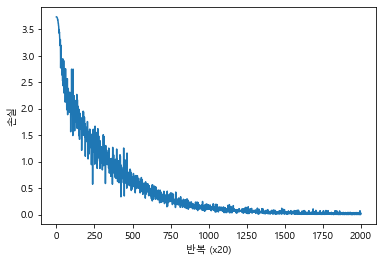

In [5]:
# 시각화
trainer.plot()

In [6]:
word_vecs = model.word_vecs
for word_id, word in id_to_word.items():
    print('%10s : '%word, word_vecs[word_id])

    sawyer :  [-1.4337426  4.260757   1.1789299 -4.365878   4.1032357]
      also :  [ 3.623684    4.3469963   2.8068187  -0.54329294 -0.25088784]
   appears :  [ 3.3580658  4.613273  -4.131768  -3.668319   4.9893475]
        in :  [2.1480734 4.9909935 4.6734424 3.5367212 4.391158 ]
        at :  [ 5.500347   5.1156645 -5.841251   0.4950545  4.960836 ]
     least :  [-0.6529104 -1.6677138  4.188932   4.9872026  5.039709 ]
     three :  [-3.63731    5.1580267 -1.7697349  6.0147634  2.4021943]
unfinished :  [ 4.506536  -4.861016   1.7404947  0.3208136  0.892961 ]
     twain :  [-3.8004086  7.1228337 -0.8539677  4.15692   -5.764587 ]
    works, :  [ 1.721725  -4.096787   4.500617  -3.3217027 -3.4483323]
           :  [-6.3984194 -1.0833635  4.3294306 -6.2750387 -0.650449 ]
      huck :  [-0.53875333 -4.387573    1.7542114   3.007332   -1.4271164 ]
       and :  [ 5.655382  -2.920708  -4.746621  -5.789444  -2.9202847]
       tom :  [-1.0392632 -5.3697586 -6.991271   2.0647316  4.447287 ]
 

## 예측 및 정확도 평가

In [7]:
h = model.predict(contexts)
print(h)
print(h.shape)  # 

preds = np.argmax(h,1)
t = np.argmax(target,1)
print('target : ',t)
print('predict: ',preds)

accuracy = np.sum(np.equal(preds,t))/len(t)
print('정확도 : ',np.round(accuracy,4))

[[2.96430308e-11 9.97589359e-01 2.96537402e-07 ... 2.45555303e-18
  3.96176539e-05 1.49999276e-18]
 [1.63001072e-10 1.78244338e-07 9.97976598e-01 ... 1.31439529e-06
  1.41635866e-04 2.39336590e-12]
 [1.48855293e-12 1.09421492e-03 3.02341303e-09 ... 5.69795851e-24
  6.92299972e-09 1.53621725e-15]
 ...
 [8.42691329e-11 3.32317892e-13 8.70770876e-06 ... 1.25083268e-04
  2.91051261e-08 9.08752805e-05]
 [2.71136756e-10 2.70169458e-04 1.37241284e-05 ... 2.88257233e-11
  9.98832766e-01 1.05386497e-16]
 [1.36833624e-10 2.43635305e-17 8.52831506e-11 ... 1.09360010e-06
  2.17430727e-15 9.98579340e-01]]
(82, 42)
target :  [ 1  2  3  4  5  6  7  8  9 10 10 10 10 10 10 10 10 11 12 13 14 15 16 17
 18 12 13 19 20 21 10 10 10 10 10 10 10 22 23  6 24 25 26 27 28 10 10 10
 10 10 10 10 10 29 13 19 20 30 31 32 33 34  8 35 10 10 10 10 10 10 10 10
 15 36 37 25 38 39 29 31 40 41]
predict:  [ 1  2  3  4  5  6  7  8 35 10 10 10 10 10 10 10 10 11 12 13 14 15 16 17
 18 12 13 19 20 21 10 10 10 10 10 10 10 22 23  

## [ 과제 2] : SkipGram신경망 모델 구현

In [8]:
class SimpleSkipGram:
    def __init__(self, vocab_size, hidden_size):  
        V, H = vocab_size, hidden_size

        # 가중치 초기화
        W_in = 0.01 * np.random.randn(V, H).astype('f')
        W_out = 0.01 * np.random.randn(H, V).astype('f')

        # 계층 생성
        self.in_layer = MatMul(W_in)   
        self.out_layer = MatMul(W_out) 
        self.loss_layer1 = SoftmaxWithLoss()
        self.loss_layer2 = SoftmaxWithLoss()

        # 모든 가중치와 기울기를 리스트에 모은다.
        layers = [self.in_layer, self.out_layer]
        self.params, self.grads = [], []
        for layer in layers:
            self.params += layer.params
            self.grads += layer.grads

        # 인스턴스 변수에 단어의 분산 표현을 저장한다.
        self.word_vecs = W_in
        
    def predict(self,target):
        h = self.in_layer.forward(target)
        s = self.out_layer.forward(h)
        return s 

    def forward(self, contexts, target):
        h = self.in_layer.forward(target)
        s = self.out_layer.forward(h)
        l1 = self.loss_layer1.forward(s, contexts[:, 0])
        l2 = self.loss_layer2.forward(s, contexts[:, 1])
        loss = l1 + l2
        return loss

    def backward(self, dout=1):
        dl1 = self.loss_layer1.backward(dout)
        dl2 = self.loss_layer2.backward(dout)
        ds = dl1 + dl2
        dh = self.out_layer.backward(ds)
        self.in_layer.backward(dh)
        return None


### 학습 코드 구현

In [9]:
window_size = 1
hidden_size = 5
batch_size = 3
max_epoch = 1000

# text = "The black cat ran so fast that the white mouse could not run away."
# text = 'You say goodbye and I say hello You say goodbye and I say hello.'
text = "Sawyer also appears in at least three unfinished Twain works, \
        Huck and Tom Among the Indians, Schoolhouse Hill and Tom Sawyer's Conspiracy.\
        While all three uncompleted works were posthumously published, \
        only Tom Sawyer's Conspiracy has a complete plot, as Twain abandoned \
        the other two works after finishing only a few chapters."

corpus, word_to_id, id_to_word = preprocess(text)

vocab_size = len(word_to_id)
contexts, target = create_contexts_target(corpus, window_size)
target = convert_one_hot(target, vocab_size)
contexts = convert_one_hot(contexts, vocab_size)
print(target)
print(contexts)
# 중앙의 단어(타깃)으로부터 주변의 여러 단어(맥락)를 예측한다

[[0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
[[[1 0 0 ... 0 0 0]
  [0 0 1 ... 0 0 0]]

 [[0 1 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 1 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 1 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 1]]

 [[0 0 0 ... 0 1 0]
  [0 0 0 ... 0 0 0]]]


In [10]:
model = SimpleSkipGram(vocab_size, hidden_size)
optimizer = Adam()
trainer = Trainer(model, optimizer)

trainer.fit(contexts, target, max_epoch, batch_size)

| 에폭 1 |  반복 1 / 27 | 시간 0[s] | 손실 7.48
| 에폭 1 |  반복 21 / 27 | 시간 0[s] | 손실 7.47
| 에폭 2 |  반복 1 / 27 | 시간 0[s] | 손실 7.47
| 에폭 2 |  반복 21 / 27 | 시간 0[s] | 손실 7.47
| 에폭 3 |  반복 1 / 27 | 시간 0[s] | 손실 7.46
| 에폭 3 |  반복 21 / 27 | 시간 0[s] | 손실 7.45
| 에폭 4 |  반복 1 / 27 | 시간 0[s] | 손실 7.44
| 에폭 4 |  반복 21 / 27 | 시간 0[s] | 손실 7.42
| 에폭 5 |  반복 1 / 27 | 시간 0[s] | 손실 7.39
| 에폭 5 |  반복 21 / 27 | 시간 0[s] | 손실 7.38
| 에폭 6 |  반복 1 / 27 | 시간 0[s] | 손실 7.35
| 에폭 6 |  반복 21 / 27 | 시간 0[s] | 손실 7.31
| 에폭 7 |  반복 1 / 27 | 시간 0[s] | 손실 7.26
| 에폭 7 |  반복 21 / 27 | 시간 0[s] | 손실 7.25
| 에폭 8 |  반복 1 / 27 | 시간 0[s] | 손실 7.13
| 에폭 8 |  반복 21 / 27 | 시간 0[s] | 손실 7.11
| 에폭 9 |  반복 1 / 27 | 시간 0[s] | 손실 7.17
| 에폭 9 |  반복 21 / 27 | 시간 0[s] | 손실 7.09
| 에폭 10 |  반복 1 / 27 | 시간 0[s] | 손실 6.71
| 에폭 10 |  반복 21 / 27 | 시간 0[s] | 손실 7.01
| 에폭 11 |  반복 1 / 27 | 시간 0[s] | 손실 6.69
| 에폭 11 |  반복 21 / 27 | 시간 0[s] | 손실 6.71
| 에폭 12 |  반복 1 / 27 | 시간 0[s] | 손실 6.98
| 에폭 12 |  반복 21 / 27 | 시간 0[s] | 손실 6.59
| 에폭 13 |  반복 1 / 27 |

| 에폭 209 |  반복 21 / 27 | 시간 1[s] | 손실 2.67
| 에폭 210 |  반복 1 / 27 | 시간 1[s] | 손실 2.26
| 에폭 210 |  반복 21 / 27 | 시간 1[s] | 손실 2.83
| 에폭 211 |  반복 1 / 27 | 시간 1[s] | 손실 2.76
| 에폭 211 |  반복 21 / 27 | 시간 1[s] | 손실 2.69
| 에폭 212 |  반복 1 / 27 | 시간 1[s] | 손실 2.66
| 에폭 212 |  반복 21 / 27 | 시간 1[s] | 손실 2.61
| 에폭 213 |  반복 1 / 27 | 시간 1[s] | 손실 2.88
| 에폭 213 |  반복 21 / 27 | 시간 1[s] | 손실 2.45
| 에폭 214 |  반복 1 / 27 | 시간 1[s] | 손실 3.28
| 에폭 214 |  반복 21 / 27 | 시간 1[s] | 손실 2.59
| 에폭 215 |  반복 1 / 27 | 시간 1[s] | 손실 2.66
| 에폭 215 |  반복 21 / 27 | 시간 1[s] | 손실 2.61
| 에폭 216 |  반복 1 / 27 | 시간 1[s] | 손실 2.66
| 에폭 216 |  반복 21 / 27 | 시간 1[s] | 손실 2.68
| 에폭 217 |  반복 1 / 27 | 시간 1[s] | 손실 2.80
| 에폭 217 |  반복 21 / 27 | 시간 1[s] | 손실 2.61
| 에폭 218 |  반복 1 / 27 | 시간 1[s] | 손실 2.75
| 에폭 218 |  반복 21 / 27 | 시간 1[s] | 손실 2.50
| 에폭 219 |  반복 1 / 27 | 시간 1[s] | 손실 3.08
| 에폭 219 |  반복 21 / 27 | 시간 1[s] | 손실 2.40
| 에폭 220 |  반복 1 / 27 | 시간 1[s] | 손실 2.90
| 에폭 220 |  반복 21 / 27 | 시간 1[s] | 손실 2.67
| 에폭 221 |  반복 1 / 27 

| 에폭 323 |  반복 1 / 27 | 시간 1[s] | 손실 2.03
| 에폭 323 |  반복 21 / 27 | 시간 1[s] | 손실 2.24
| 에폭 324 |  반복 1 / 27 | 시간 1[s] | 손실 2.17
| 에폭 324 |  반복 21 / 27 | 시간 1[s] | 손실 2.27
| 에폭 325 |  반복 1 / 27 | 시간 1[s] | 손실 1.97
| 에폭 325 |  반복 21 / 27 | 시간 1[s] | 손실 1.94
| 에폭 326 |  반복 1 / 27 | 시간 1[s] | 손실 2.51
| 에폭 326 |  반복 21 / 27 | 시간 1[s] | 손실 2.32
| 에폭 327 |  반복 1 / 27 | 시간 1[s] | 손실 1.47
| 에폭 327 |  반복 21 / 27 | 시간 1[s] | 손실 2.23
| 에폭 328 |  반복 1 / 27 | 시간 1[s] | 손실 2.12
| 에폭 328 |  반복 21 / 27 | 시간 1[s] | 손실 2.19
| 에폭 329 |  반복 1 / 27 | 시간 1[s] | 손실 2.07
| 에폭 329 |  반복 21 / 27 | 시간 1[s] | 손실 2.16
| 에폭 330 |  반복 1 / 27 | 시간 1[s] | 손실 2.06
| 에폭 330 |  반복 21 / 27 | 시간 1[s] | 손실 2.25
| 에폭 331 |  반복 1 / 27 | 시간 1[s] | 손실 1.86
| 에폭 331 |  반복 21 / 27 | 시간 1[s] | 손실 2.17
| 에폭 332 |  반복 1 / 27 | 시간 1[s] | 손실 1.73
| 에폭 332 |  반복 21 / 27 | 시간 1[s] | 손실 2.10
| 에폭 333 |  반복 1 / 27 | 시간 1[s] | 손실 2.37
| 에폭 333 |  반복 21 / 27 | 시간 1[s] | 손실 2.14
| 에폭 334 |  반복 1 / 27 | 시간 1[s] | 손실 2.18
| 에폭 334 |  반복 21 / 27 

| 에폭 434 |  반복 1 / 27 | 시간 2[s] | 손실 1.80
| 에폭 434 |  반복 21 / 27 | 시간 2[s] | 손실 1.94
| 에폭 435 |  반복 1 / 27 | 시간 2[s] | 손실 1.87
| 에폭 435 |  반복 21 / 27 | 시간 2[s] | 손실 1.94
| 에폭 436 |  반복 1 / 27 | 시간 2[s] | 손실 1.83
| 에폭 436 |  반복 21 / 27 | 시간 2[s] | 손실 1.96
| 에폭 437 |  반복 1 / 27 | 시간 2[s] | 손실 1.73
| 에폭 437 |  반복 21 / 27 | 시간 2[s] | 손실 2.01
| 에폭 438 |  반복 1 / 27 | 시간 2[s] | 손실 1.44
| 에폭 438 |  반복 21 / 27 | 시간 2[s] | 손실 2.01
| 에폭 439 |  반복 1 / 27 | 시간 2[s] | 손실 1.47
| 에폭 439 |  반복 21 / 27 | 시간 2[s] | 손실 1.95
| 에폭 440 |  반복 1 / 27 | 시간 2[s] | 손실 1.63
| 에폭 440 |  반복 21 / 27 | 시간 2[s] | 손실 1.87
| 에폭 441 |  반복 1 / 27 | 시간 2[s] | 손실 1.89
| 에폭 441 |  반복 21 / 27 | 시간 2[s] | 손실 1.98
| 에폭 442 |  반복 1 / 27 | 시간 2[s] | 손실 1.79
| 에폭 442 |  반복 21 / 27 | 시간 2[s] | 손실 1.95
| 에폭 443 |  반복 1 / 27 | 시간 2[s] | 손실 1.66
| 에폭 443 |  반복 21 / 27 | 시간 2[s] | 손실 1.77
| 에폭 444 |  반복 1 / 27 | 시간 2[s] | 손실 2.10
| 에폭 444 |  반복 21 / 27 | 시간 2[s] | 손실 1.77
| 에폭 445 |  반복 1 / 27 | 시간 2[s] | 손실 2.07
| 에폭 445 |  반복 21 / 27 

| 에폭 549 |  반복 1 / 27 | 시간 2[s] | 손실 1.63
| 에폭 549 |  반복 21 / 27 | 시간 2[s] | 손실 1.55
| 에폭 550 |  반복 1 / 27 | 시간 2[s] | 손실 2.29
| 에폭 550 |  반복 21 / 27 | 시간 2[s] | 손실 1.62
| 에폭 551 |  반복 1 / 27 | 시간 2[s] | 손실 2.14
| 에폭 551 |  반복 21 / 27 | 시간 2[s] | 손실 1.70
| 에폭 552 |  반복 1 / 27 | 시간 2[s] | 손실 1.81
| 에폭 552 |  반복 21 / 27 | 시간 2[s] | 손실 1.83
| 에폭 553 |  반복 1 / 27 | 시간 2[s] | 손실 1.60
| 에폭 553 |  반복 21 / 27 | 시간 2[s] | 손실 1.87
| 에폭 554 |  반복 1 / 27 | 시간 2[s] | 손실 1.45
| 에폭 554 |  반복 21 / 27 | 시간 2[s] | 손실 1.88
| 에폭 555 |  반복 1 / 27 | 시간 2[s] | 손실 1.48
| 에폭 555 |  반복 21 / 27 | 시간 2[s] | 손실 1.74
| 에폭 556 |  반복 1 / 27 | 시간 2[s] | 손실 2.02
| 에폭 556 |  반복 21 / 27 | 시간 2[s] | 손실 1.81
| 에폭 557 |  반복 1 / 27 | 시간 2[s] | 손실 1.46
| 에폭 557 |  반복 21 / 27 | 시간 2[s] | 손실 1.69
| 에폭 558 |  반복 1 / 27 | 시간 2[s] | 손실 1.78
| 에폭 558 |  반복 21 / 27 | 시간 2[s] | 손실 1.80
| 에폭 559 |  반복 1 / 27 | 시간 2[s] | 손실 1.77
| 에폭 559 |  반복 21 / 27 | 시간 2[s] | 손실 1.70
| 에폭 560 |  반복 1 / 27 | 시간 2[s] | 손실 1.95
| 에폭 560 |  반복 21 / 27 

| 에폭 662 |  반복 21 / 27 | 시간 3[s] | 손실 1.82
| 에폭 663 |  반복 1 / 27 | 시간 3[s] | 손실 1.70
| 에폭 663 |  반복 21 / 27 | 시간 3[s] | 손실 1.70
| 에폭 664 |  반복 1 / 27 | 시간 3[s] | 손실 1.67
| 에폭 664 |  반복 21 / 27 | 시간 3[s] | 손실 1.56
| 에폭 665 |  반복 1 / 27 | 시간 3[s] | 손실 2.17
| 에폭 665 |  반복 21 / 27 | 시간 3[s] | 손실 1.70
| 에폭 666 |  반복 1 / 27 | 시간 3[s] | 손실 1.93
| 에폭 666 |  반복 21 / 27 | 시간 3[s] | 손실 1.60
| 에폭 667 |  반복 1 / 27 | 시간 3[s] | 손실 1.69
| 에폭 667 |  반복 21 / 27 | 시간 3[s] | 손실 1.63
| 에폭 668 |  반복 1 / 27 | 시간 3[s] | 손실 2.02
| 에폭 668 |  반복 21 / 27 | 시간 3[s] | 손실 1.48
| 에폭 669 |  반복 1 / 27 | 시간 3[s] | 손실 2.36
| 에폭 669 |  반복 21 / 27 | 시간 3[s] | 손실 1.61
| 에폭 670 |  반복 1 / 27 | 시간 3[s] | 손실 2.14
| 에폭 670 |  반복 21 / 27 | 시간 3[s] | 손실 1.72
| 에폭 671 |  반복 1 / 27 | 시간 3[s] | 손실 1.60
| 에폭 671 |  반복 21 / 27 | 시간 3[s] | 손실 1.69
| 에폭 672 |  반복 1 / 27 | 시간 3[s] | 손실 1.64
| 에폭 672 |  반복 21 / 27 | 시간 3[s] | 손실 1.70
| 에폭 673 |  반복 1 / 27 | 시간 3[s] | 손실 1.87
| 에폭 673 |  반복 21 / 27 | 시간 3[s] | 손실 1.61
| 에폭 674 |  반복 1 / 27 

| 에폭 775 |  반복 21 / 27 | 시간 3[s] | 손실 1.67
| 에폭 776 |  반복 1 / 27 | 시간 3[s] | 손실 1.65
| 에폭 776 |  반복 21 / 27 | 시간 3[s] | 손실 1.63
| 에폭 777 |  반복 1 / 27 | 시간 3[s] | 손실 1.95
| 에폭 777 |  반복 21 / 27 | 시간 3[s] | 손실 1.57
| 에폭 778 |  반복 1 / 27 | 시간 3[s] | 손실 1.93
| 에폭 778 |  반복 21 / 27 | 시간 3[s] | 손실 1.61
| 에폭 779 |  반복 1 / 27 | 시간 3[s] | 손실 2.18
| 에폭 779 |  반복 21 / 27 | 시간 3[s] | 손실 1.75
| 에폭 780 |  반복 1 / 27 | 시간 3[s] | 손실 1.24
| 에폭 780 |  반복 21 / 27 | 시간 3[s] | 손실 1.71
| 에폭 781 |  반복 1 / 27 | 시간 3[s] | 손실 1.66
| 에폭 781 |  반복 21 / 27 | 시간 3[s] | 손실 1.74
| 에폭 782 |  반복 1 / 27 | 시간 3[s] | 손실 1.86
| 에폭 782 |  반복 21 / 27 | 시간 3[s] | 손실 1.53
| 에폭 783 |  반복 1 / 27 | 시간 3[s] | 손실 1.90
| 에폭 783 |  반복 21 / 27 | 시간 3[s] | 손실 1.79
| 에폭 784 |  반복 1 / 27 | 시간 3[s] | 손실 1.31
| 에폭 784 |  반복 21 / 27 | 시간 3[s] | 손실 1.77
| 에폭 785 |  반복 1 / 27 | 시간 3[s] | 손실 1.34
| 에폭 785 |  반복 21 / 27 | 시간 3[s] | 손실 1.76
| 에폭 786 |  반복 1 / 27 | 시간 3[s] | 손실 1.79
| 에폭 786 |  반복 21 / 27 | 시간 3[s] | 손실 1.62
| 에폭 787 |  반복 1 / 27 

| 에폭 879 |  반복 21 / 27 | 시간 4[s] | 손실 1.70
| 에폭 880 |  반복 1 / 27 | 시간 4[s] | 손실 1.86
| 에폭 880 |  반복 21 / 27 | 시간 4[s] | 손실 1.78
| 에폭 881 |  반복 1 / 27 | 시간 4[s] | 손실 1.38
| 에폭 881 |  반복 21 / 27 | 시간 4[s] | 손실 1.62
| 에폭 882 |  반복 1 / 27 | 시간 4[s] | 손실 1.80
| 에폭 882 |  반복 21 / 27 | 시간 4[s] | 손실 1.63
| 에폭 883 |  반복 1 / 27 | 시간 4[s] | 손실 1.79
| 에폭 883 |  반복 21 / 27 | 시간 4[s] | 손실 1.59
| 에폭 884 |  반복 1 / 27 | 시간 4[s] | 손실 1.67
| 에폭 884 |  반복 21 / 27 | 시간 4[s] | 손실 1.52
| 에폭 885 |  반복 1 / 27 | 시간 4[s] | 손실 2.31
| 에폭 885 |  반복 21 / 27 | 시간 4[s] | 손실 1.63
| 에폭 886 |  반복 1 / 27 | 시간 4[s] | 손실 1.69
| 에폭 886 |  반복 21 / 27 | 시간 4[s] | 손실 1.73
| 에폭 887 |  반복 1 / 27 | 시간 4[s] | 손실 1.49
| 에폭 887 |  반복 21 / 27 | 시간 4[s] | 손실 1.60
| 에폭 888 |  반복 1 / 27 | 시간 4[s] | 손실 2.07
| 에폭 888 |  반복 21 / 27 | 시간 4[s] | 손실 1.58
| 에폭 889 |  반복 1 / 27 | 시간 4[s] | 손실 1.84
| 에폭 889 |  반복 21 / 27 | 시간 4[s] | 손실 1.69
| 에폭 890 |  반복 1 / 27 | 시간 4[s] | 손실 1.78
| 에폭 890 |  반복 21 / 27 | 시간 4[s] | 손실 1.71
| 에폭 891 |  반복 1 / 27 

| 에폭 989 |  반복 1 / 27 | 시간 5[s] | 손실 1.44
| 에폭 989 |  반복 21 / 27 | 시간 5[s] | 손실 1.70
| 에폭 990 |  반복 1 / 27 | 시간 5[s] | 손실 1.68
| 에폭 990 |  반복 21 / 27 | 시간 5[s] | 손실 1.70
| 에폭 991 |  반복 1 / 27 | 시간 5[s] | 손실 1.50
| 에폭 991 |  반복 21 / 27 | 시간 5[s] | 손실 1.64
| 에폭 992 |  반복 1 / 27 | 시간 5[s] | 손실 1.92
| 에폭 992 |  반복 21 / 27 | 시간 5[s] | 손실 1.60
| 에폭 993 |  반복 1 / 27 | 시간 5[s] | 손실 1.83
| 에폭 993 |  반복 21 / 27 | 시간 5[s] | 손실 1.59
| 에폭 994 |  반복 1 / 27 | 시간 5[s] | 손실 1.94
| 에폭 994 |  반복 21 / 27 | 시간 5[s] | 손실 1.50
| 에폭 995 |  반복 1 / 27 | 시간 5[s] | 손실 2.02
| 에폭 995 |  반복 21 / 27 | 시간 5[s] | 손실 1.64
| 에폭 996 |  반복 1 / 27 | 시간 5[s] | 손실 1.69
| 에폭 996 |  반복 21 / 27 | 시간 5[s] | 손실 1.54
| 에폭 997 |  반복 1 / 27 | 시간 5[s] | 손실 1.97
| 에폭 997 |  반복 21 / 27 | 시간 5[s] | 손실 1.62
| 에폭 998 |  반복 1 / 27 | 시간 5[s] | 손실 1.76
| 에폭 998 |  반복 21 / 27 | 시간 5[s] | 손실 1.56
| 에폭 999 |  반복 1 / 27 | 시간 5[s] | 손실 2.04
| 에폭 999 |  반복 21 / 27 | 시간 5[s] | 손실 1.62
| 에폭 1000 |  반복 1 / 27 | 시간 5[s] | 손실 1.83
| 에폭 1000 |  반복 21 / 2

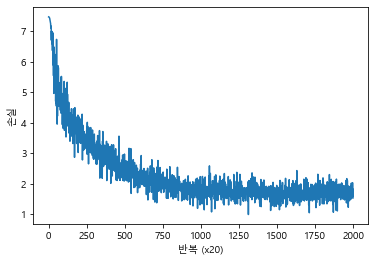

In [11]:
trainer.plot()

In [12]:
word_vecs = model.word_vecs
for word_id, word in id_to_word.items():
    print('%10s : '%word, word_vecs[word_id])    

    sawyer :  [-3.9496250e-03  2.1532092e-02  6.0410290e-05  6.7102448e-03
 -6.4239143e-03]
      also :  [-1.4665407 -3.8653557 -2.6149428  2.983294   2.9794765]
   appears :  [ 3.546566    0.56557536 -3.9891074   3.3776789   3.6296155 ]
        in :  [ 0.17577454 -1.5384196  -2.2732575   0.07447926  4.493194  ]
        at :  [ 4.136185   -3.2731164  -1.108724    4.5033073   0.90408784]
     least :  [ 2.292891   -0.9852596   0.55748445 -1.7832748   4.2897243 ]
     three :  [ 1.558868  -2.142668   1.6456993  3.4379454 -1.1924253]
unfinished :  [ 4.1368856  -0.05834485  1.6921412  -4.0192375   0.38594884]
     twain :  [ 1.6051918 -3.4321573  3.8591146 -1.8978744 -2.8465145]
    works, :  [ 2.5710433  2.3570366  1.9786737 -2.4383883 -2.9962401]
           :  [-1.6720022   0.56165606  1.5625751  -1.0357808  -0.9427788 ]
      huck :  [ 0.89533216  4.2785153   3.1634636  -3.6925209  -0.3836025 ]
       and :  [-1.3221984  -2.3837168   0.03287814  0.32693115 -4.8545995 ]
       tom :  [-

## 예측 및 정확도 평가

In [13]:
def get_correct(num):
    h = model.predict(target[num,:])  
    pred0 = np.argmax(h,0)
    h1 = h
    h[pred0] = 0
    pred1 = np.argmax(h1,0)
    c0 = np.argmax(contexts[num,0,:],0) 
    c1 = np.argmax(contexts[num,1,:],0) 
    print('context : ',c0,c1)
    print('predict : ',pred0,pred1)
    print('-'*50)
    correct = 0
    if (c0==pred0)|(c0==pred1):
        correct +=1
    if (c1==pred0)|(c1==pred1):
        correct +=1
    return correct    

acc = 0
for k in range(target.shape[0]) : 
    correct = get_correct(k)
    acc += correct

accuracy = acc/target.shape[0]/2 
print('정확도 : ',np.round(accuracy,4)) 

context :  0 2
predict :  2 0
--------------------------------------------------
context :  1 3
predict :  3 1
--------------------------------------------------
context :  2 4
predict :  2 4
--------------------------------------------------
context :  3 5
predict :  3 5
--------------------------------------------------
context :  4 6
predict :  4 6
--------------------------------------------------
context :  5 7
predict :  23 5
--------------------------------------------------
context :  6 8
predict :  6 8
--------------------------------------------------
context :  7 9
predict :  7 34
--------------------------------------------------
context :  8 10
predict :  10 8
--------------------------------------------------
context :  9 10
predict :  10 28
--------------------------------------------------
context :  10 10
predict :  10 28
--------------------------------------------------
context :  10 10
predict :  10 28
--------------------------------------------------
context :  10

In [14]:
print(contexts)
contexts.shape

[[[1 0 0 ... 0 0 0]
  [0 0 1 ... 0 0 0]]

 [[0 1 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 1 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 1 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 1]]

 [[0 0 0 ... 0 1 0]
  [0 0 0 ... 0 0 0]]]


(82, 2, 42)

In [15]:
print(contexts[0,:,:])
contexts.shape

[[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0]]


(82, 2, 42)

In [16]:
print(target[0,:])
target.shape

[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0]


(82, 42)